In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import random
import math
df = pd.read_csv("/content/drive/MyDrive/ratings.csv")

In [5]:
df=df[:1000]

In [6]:
df

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200
...,...,...,...,...
995,A3317L1113QN7O,978807894X,5.0,1387843200
996,A3ABTLXPQP73TB,978807894X,3.0,1273276800
997,A2P2FTA24RAFBA,978807894X,5.0,1395014400
998,A2CB2CNAOCG97W,978807894X,5.0,1395014400


In [7]:
products=list(df["ProductId"].unique())
users=list(df["UserId"].unique())


In [8]:
len(products),len(users)

(261, 948)

In [9]:
df_ratings=df.pivot(index='UserId', columns='ProductId', values='Rating').fillna(0)

In [10]:
df_ratings

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,9788077315,9788077382,9788077625,9788077927,978807801X,9788078389,9788078885,9788078893,9788078907,978807894X
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A024581134CV80ZBLIZTZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A05492663T95KW63BR75K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100GYE1W4OXZ8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10205RFE66H1R,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZGGH4GS18RUN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZLE2XFH3JUNG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZLYAJ8XE443K,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df_rating=df_ratings.values

In [12]:
temp_rate=df_rating.flatten()
temp_rate=list(temp_rate)
ct=temp_rate.count(0)
print("Sparsity in %: ",(ct/((len(df_ratings.columns))*(len(df_ratings.index)))*100))

Sparsity in %:  99.59584202272984


In [13]:
user_ratings_mean=np.mean(df_rating,axis=1)
R_demeaned=df_rating-user_ratings_mean.reshape(-1, 1)

In [14]:
R_demeaned

array([[-0.01915709, -0.01915709, -0.01915709, ..., -0.01915709,
        -0.01915709, -0.01915709],
       [-0.01915709, -0.01915709, -0.01915709, ..., -0.01915709,
        -0.01915709, -0.01915709],
       [-0.00383142, -0.00383142, -0.00383142, ..., -0.00383142,
        -0.00383142, -0.00383142],
       ...,
       [-0.01915709, -0.01915709, -0.01915709, ..., -0.01915709,
        -0.01915709, -0.01915709],
       [-0.01915709, -0.01915709, -0.01915709, ..., -0.01915709,
        -0.01915709, -0.01915709],
       [-0.01532567, -0.01532567, -0.01532567, ..., -0.01532567,
        -0.01532567, -0.01532567]])

In [15]:

from scipy.sparse.linalg import svds
U,sigma,Vt=svds(R_demeaned, k = 25)
sigma=np.diag(sigma)

Doing Singular value decomposition

In [16]:
len(U),len(U[0]),len(sigma),len(sigma[0]),len(Vt),len(Vt[0])

(948, 25, 25, 25, 25, 261)

In [17]:
U=np.transpose(U)
U=pd.DataFrame(U,columns=df_ratings.index)

In [18]:
#Vt=Vt.T
Vt=pd.DataFrame(Vt,columns=df_ratings.columns)

In [19]:
value=df_ratings.values
v=value.flatten()
mean=np.mean(v)
mean

0.016606851286030684

In [20]:
rate=[]
for i in df_ratings.index:
  for j in df_ratings.columns:
    ans=np.dot(U[i],Vt[j])
    lst=np.mean(df_ratings.loc[i])
    vali1=np.mean(df_ratings[j])
    rate.append(mean+(lst-mean)+(vali1-mean)+ans)
rate=np.array(rate)
rate=rate.reshape(948,261)
rate

array([[ 0.00706143,  0.01020798,  0.00602376, ...,  0.00288613,
         0.00706143,  0.02583705],
       [ 0.00791057,  0.01107781,  0.0068532 , ...,  0.00368477,
         0.00791057,  0.02693263],
       [-0.0074854 , -0.00432035, -0.00854071, ..., -0.01170598,
        -0.0074854 ,  0.01150827],
       ...,
       [ 0.00704213,  0.01017872,  0.00601339, ...,  0.00288873,
         0.00704213,  0.02566023],
       [ 0.00772352,  0.01088315,  0.00667317, ...,  0.00351534,
         0.00772352,  0.02663698],
       [ 0.00342141,  0.00656584,  0.00238537, ..., -0.00075041,
         0.00342141,  0.02214448]])

In [21]:
len(rate)

948

In [22]:
rate=pd.DataFrame(rate,columns=df_ratings.columns,index=df_ratings.index)

In [23]:
rate

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,9788077315,9788077382,9788077625,9788077927,978807801X,9788078389,9788078885,9788078893,9788078907,978807894X
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.007061,0.010208,0.006024,0.002886,0.007061,0.007203,0.006446,0.007061,0.015660,0.006966,...,0.007061,0.003936,0.007061,0.003936,0.007061,0.007061,0.009163,0.002886,0.007061,0.025837
A024581134CV80ZBLIZTZ,0.007911,0.011078,0.006853,0.003685,0.007911,0.006976,0.007757,0.007911,0.015318,0.007930,...,0.007911,0.004740,0.007911,0.004740,0.007911,0.007911,0.010021,0.003685,0.007911,0.026933
A05492663T95KW63BR75K,-0.007485,-0.004320,-0.008541,-0.011706,-0.007485,-0.007656,-0.007513,-0.007485,0.000765,-0.007482,...,-0.007485,-0.010651,-0.007485,-0.010651,-0.007485,-0.007485,-0.005375,-0.011706,-0.007485,0.011508
A100GYE1W4OXZ8,0.007089,0.010239,0.006048,0.002906,0.007089,0.007240,0.006678,0.007089,0.015696,0.007018,...,0.007089,0.003956,0.007089,0.003956,0.007089,0.007089,0.009192,0.002906,0.007089,0.025909
A10205RFE66H1R,0.000210,0.003376,-0.000846,-0.004013,0.000210,-0.000314,0.000125,0.000210,0.008071,0.000221,...,0.000210,-0.002958,0.000210,-0.002958,0.000210,0.000210,0.002320,-0.004013,0.000210,0.019217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZGGH4GS18RUN,0.004059,0.007226,0.003002,-0.000165,0.004059,0.003344,0.003943,0.004059,0.011709,0.004074,...,0.004059,0.000890,0.004059,0.000890,0.004059,0.004059,0.006170,-0.000165,0.004059,0.023073
AZLE2XFH3JUNG,0.027188,0.030359,0.026127,0.022953,0.027188,0.024938,0.026802,0.027188,0.033143,0.027236,...,0.027188,0.024010,0.027188,0.024010,0.027188,0.027188,0.029300,0.022953,0.027188,0.046259
AZLYAJ8XE443K,0.007042,0.010179,0.006013,0.002889,0.007042,0.007173,0.004829,0.007042,0.015645,0.006828,...,0.007042,0.003936,0.007042,0.003936,0.007042,0.007042,0.009140,0.002889,0.007042,0.025660


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=49), k=(2, 50))

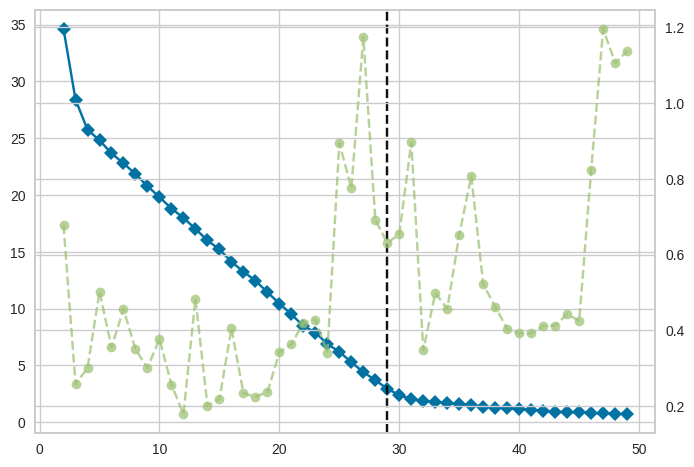

In [24]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
#elbow method for finding no.of.clusters
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k-range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,50), timings= True)
visualizer.fit(rate)        # Fit data to visualizer

Preference clustering

In [25]:
noofclusters=29
kmeans = KMeans(n_clusters=noofclusters, random_state=0).fit(rate)

In [26]:
rate["Cluster"]=kmeans.labels_

In [27]:
rate["Cluster"].unique()

array([26,  0,  2, 13, 23, 21,  8, 16, 12, 10, 15, 11, 25,  3, 20,  5, 19,
       22,  7, 18, 14,  4, 28, 24, 17, 27,  9,  6,  1], dtype=int32)

In [28]:
rate

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,9788077382,9788077625,9788077927,978807801X,9788078389,9788078885,9788078893,9788078907,978807894X,Cluster
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.007061,0.010208,0.006024,0.002886,0.007061,0.007203,0.006446,0.007061,0.015660,0.006966,...,0.003936,0.007061,0.003936,0.007061,0.007061,0.009163,0.002886,0.007061,0.025837,26
A024581134CV80ZBLIZTZ,0.007911,0.011078,0.006853,0.003685,0.007911,0.006976,0.007757,0.007911,0.015318,0.007930,...,0.004740,0.007911,0.004740,0.007911,0.007911,0.010021,0.003685,0.007911,0.026933,0
A05492663T95KW63BR75K,-0.007485,-0.004320,-0.008541,-0.011706,-0.007485,-0.007656,-0.007513,-0.007485,0.000765,-0.007482,...,-0.010651,-0.007485,-0.010651,-0.007485,-0.007485,-0.005375,-0.011706,-0.007485,0.011508,2
A100GYE1W4OXZ8,0.007089,0.010239,0.006048,0.002906,0.007089,0.007240,0.006678,0.007089,0.015696,0.007018,...,0.003956,0.007089,0.003956,0.007089,0.007089,0.009192,0.002906,0.007089,0.025909,13
A10205RFE66H1R,0.000210,0.003376,-0.000846,-0.004013,0.000210,-0.000314,0.000125,0.000210,0.008071,0.000221,...,-0.002958,0.000210,-0.002958,0.000210,0.000210,0.002320,-0.004013,0.000210,0.019217,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZGGH4GS18RUN,0.004059,0.007226,0.003002,-0.000165,0.004059,0.003344,0.003943,0.004059,0.011709,0.004074,...,0.000890,0.004059,0.000890,0.004059,0.004059,0.006170,-0.000165,0.004059,0.023073,0
AZLE2XFH3JUNG,0.027188,0.030359,0.026127,0.022953,0.027188,0.024938,0.026802,0.027188,0.033143,0.027236,...,0.024010,0.027188,0.024010,0.027188,0.027188,0.029300,0.022953,0.027188,0.046259,0
AZLYAJ8XE443K,0.007042,0.010179,0.006013,0.002889,0.007042,0.007173,0.004829,0.007042,0.015645,0.006828,...,0.003936,0.007042,0.003936,0.007042,0.007042,0.009140,0.002889,0.007042,0.025660,5


In [29]:
models=pd.DataFrame(columns=products)
for i in range(noofclusters):
  temp=rate[rate["Cluster"]==i]
  val=np.mean(temp)
  v=val.to_dict()
  models.loc[len(models.index)]=v


In [30]:
models

,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,9788077315,9788077382,9788077625,9788077927,978807801X,9788078389,9788078885,9788078893,9788078907,978807894X
0,0.007719,0.010887,0.006662,0.003492,0.007719,0.006745,0.007702,0.007719,0.015081,0.007743,...,0.007719,0.004548,0.007719,0.004548,0.007719,0.007719,0.009831,0.003492,0.007719,0.026748
1,0.142271,0.145442,0.141211,0.138037,0.142271,0.128470,0.208499,0.142271,0.134674,0.142271,...,0.142271,0.139093,0.142271,0.139093,0.142271,0.142271,0.144384,0.138037,0.142271,0.161303
2,-0.007525,-0.004360,-0.008579,-0.011743,-0.007525,-0.007643,-0.007870,-0.007525,0.000788,-0.007525,...,-0.007525,-0.010688,-0.007525,-0.010688,-0.007525,-0.007525,-0.005415,-0.011743,-0.007525,0.011460
3,0.005813,0.008956,0.004779,0.001645,0.005813,0.005744,0.002677,0.005813,0.014206,0.005608,...,0.005813,0.002694,0.005813,0.002694,0.005813,0.005813,0.007913,0.001645,0.005813,0.024493
4,0.226341,0.229136,0.225633,0.223002,0.226341,0.490279,0.231397,0.226341,0.526682,0.223838,...,0.226341,0.223955,0.226341,0.223955,0.226341,0.226341,0.228289,0.223002,0.226341,0.240609
5,0.007361,0.010499,0.006331,0.003204,0.007361,0.007413,0.005245,0.007361,0.015875,0.007159,...,0.007361,0.004252,0.007361,0.004252,0.007361,0.007361,0.009459,0.003204,0.007361,0.026000
6,0.007113,0.010261,0.006075,0.002934,0.007113,0.006933,0.001526,0.007113,0.015413,0.006911,...,0.007113,0.003984,0.007113,0.003984,0.007113,0.007113,0.009216,0.002934,0.007113,0.025844
7,0.006575,0.009717,0.005542,0.002411,0.006575,0.006657,0.005319,0.006575,0.015113,0.006424,...,0.006575,0.003459,0.006575,0.003459,0.006575,0.006575,0.008675,0.002411,0.006575,0.025273
8,0.006404,0.009548,0.005368,0.002233,0.006404,0.006521,0.005560,0.006404,0.014977,0.006286,...,0.006404,0.003282,0.006404,0.003282,0.006404,0.006404,0.008505,0.002233,0.006404,0.025147
9,0.005914,0.009057,0.004880,0.001747,0.005914,0.005996,0.004738,0.005914,0.014452,0.005771,...,0.005914,0.002796,0.005914,0.002796,0.005914,0.005914,0.008014,0.001747,0.005914,0.024625


In [31]:
#UCB1_approach
def ColdStartRecommendation(login):
  explore=[]
  products=list(rate.columns)
  #explore
  arms=[i for i in range(len(models)-1)]
  for i in range(len(models)):
      pred=list(models.loc[i])
      item=max(pred)
      fdbk=random.randint(1,5)
      rating=fdbk/5
      explore.append((i,rating))
  arm_reward=[];arm_list=[]
  recommended=[]
  #exploit
  for i in range(len(explore)):
      arm_list.append(explore[i][0])
  arm_reward=[explore[i][1] for i in range(len(explore))]
  trials=5
  print("Recommended",trials  ," Products")
  for t in range(trials):
    maxi=-1
    choosen_arm = -1
    for arm in range(len(arms)):
        arm_count=arm_list.count(arm)
        val=arm_reward[arm]+math.sqrt(2*(math.log(t+1+len(arms))/arm_count))
        if val>maxi:
          maxi=val
          choosen_arm=arm
    ct=arm_list.count(choosen_arm)
    reward=random.randint(1,5)
    reward=reward/5
    arm_reward[choosen_arm] =(arm_reward[choosen_arm]*ct+reward)/(ct+1)
    lst=list(models.loc[choosen_arm])
    ind=lst.index(max(lst))
    recommended.append(products[ind])
    print(products[ind])
    products.pop(ind)
  if login:
     return arm_list,arm_reward,recommended

In [32]:
def UserRecommender(arm_reward,arm_list,products):
  recommended=[]
  arms=[i for i in range(len(models)-1)]
  trials=5
  print("Recommended",trials  ," Products")
  for t in range(trials):
      maxi=-1
      choosen_arm = -1
      for arm in range(len(arms)):
          arm_count=arm_list.count(arm)
          val=arm_reward[arm]+math.sqrt(2*(math.log(t+1+len(arms))/arm_count))
          if val>maxi:
            maxi=val
            choosen_arm=arm
      ct=arm_list.count(choosen_arm)
      reward=random.randint(1,5)
      reward=reward/5
      arm_reward[choosen_arm] =(arm_reward[choosen_arm]*ct+reward)/(ct+1)
      lst=list(models.loc[choosen_arm])
      ind=lst.index(max(lst))
      recommended.append(products[ind])
      print(products[ind])
      products.pop(ind)
  return recommended

In [33]:
Userarmlist={}
Userarmreward={}
Products_recommended={}


In [36]:
print("Welcome to the Product Website")
inpt=int(input("Do you want to login?.....if yes give 1 else 0   "))
overallproducts=set(list(rate.columns))
if inpt:
  name=input("Enter Username   ")
  if name in Userarmlist:
    arm_list=Userarmlist[name]
    arm_reward=Userarmreward[name]
    temp_products=set(list(Products_recommended[name]))
    print(len(overallproducts),len(temp_products))
    products=list(overallproducts-temp_products)
    print(len(products))
    recommended=UserRecommender(arm_reward,arm_list,products)
    Products_recommended[name].extend(recommended)
  else:
    arm_list,arm_reward,recommended=ColdStartRecommendation(1)
    Userarmlist[name]=arm_list
    Userarmreward[name]=arm_reward
    Products_recommended[name]=recommended
else:
    ColdStartRecommendation(0)





Welcome to the Product Website
Do you want to login?.....if yes give 1 else 0   1
Enter Username   Janani
Recommended 5  Products
9788072119
1304622657
9788073492
1412759676
9788074286


In [37]:
print(Userarmreward)
print(Products_recommended)

{'Janani': [0.8, 0.2, 0.6, 0.8, 0.7, 0.7, 0.9, 0.8, 1.0, 0.6, 0.2, 0.4, 0.6, 0.4, 0.6, 0.2, 0.8, 0.4, 0.6, 0.6, 0.2, 0.2, 0.4, 0.4, 0.4, 1.0, 0.6, 1.0, 1.0]}
{'Janani': ['9788072119', '1304622657', '9788073492', '1412759676', '9788074286']}
